In [71]:
# This program will take pictures of cats from google search and use them to train a nural net model. 
# The data gathered is too small for to train the modat, thus this program serves a s proof of concept only.

import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def getdata(url):
    r = requests.get(url)
    return r.text

# Create a folder named 'cats' if it doesn't exist
folder_name = 'cats'
os.makedirs(folder_name, exist_ok=True)

# URLs to scrape images from
urls = [
    "https://www.google.com/search?q=kittens&tbm=isch&ved=",
    "https://www.google.com/search?q=cute+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=cats&tbm=isch&ved=",
    "https://www.google.com/search?q=cat&tbm=isch&ved=",
    "https://www.google.com/search?q=kitten&tbm=isch&ved=",
    "https://www.google.com/search?q=cute+kittens&tbm=isch&ved=",
    "https://www.google.com/search?q=cute+kitten&tbm=isch&ved=",
    "https://www.google.com/search?q=cute+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=my+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=my+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=sleeping+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=eating+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=gray+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=black+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=white+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=orange+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=happy+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=love+cat&tbm=isch&ved=",
    "https://www.google.com/search?q=sleeping+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=eating+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=gray+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=black+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=white+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=orange+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=happy+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=love+cats&tbm=isch&ved=",
    # Additional queries
    "https://www.google.com/search?q=funny+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=silly+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=adorable+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=beautiful+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=cool+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=angry+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=sleepy+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=hungry+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tiny+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=big+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=fluffy+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=striped+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tabby+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=calico+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tuxedo+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=siamese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=persian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bengal+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=russian+blue+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=scottish+fold+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=maine+coon+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=sphynx+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=abyssinian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=polydactyl+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=himalayan+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=british+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=siberian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=balinese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=selkirk+rex+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=pixie+bob+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ocicat&tbm=isch&ved=",
    "https://www.google.com/search?q=toyger+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=funny+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=silly+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=adorable+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=beautiful+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=cool+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=angry+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=sleepy+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=hungry+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tiny+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=big+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=fluffy+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=striped+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tabby+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=calico+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tuxedo+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=siamese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=persian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bengal+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=russian+blue+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=scottish+fold+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=maine+coon+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=sphynx+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=abyssinian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=polydactyl+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=himalayan+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=british+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=siberian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=balinese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=selkirk+rex+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=pixie+bob+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ocicat&tbm=isch&ved=",
    "https://www.google.com/search?q=toyger+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=british+longhair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=burmilla+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ocicat&tbm=isch&ved=",
    "https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chinchilla+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=cymric+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=donskoy+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=himalayan+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=munchkin+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ocicat&tbm=isch&ved=",
    "https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=abyssinian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bengal+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=british+longhair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=burmilla+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ocicat&tbm=isch&ved=",
    "https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=british+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
"https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
"https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
"https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
"https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chinchilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cymric+cats&tbm=isch&ved=",
"https://www.google.com/search?q=donskoy+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=himalayan+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=munchkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=abyssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bengal+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=british+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
"https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
"https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
"https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
"https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chinchilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cymric+cats&tbm=isch&ved=",
"https://www.google.com/search?q=donskoy+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=himalayan+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=munchkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=abyssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bengal+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=british+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
"https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
"https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
"https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
"https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=chinchilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cymric+cats&tbm=isch&ved=",
"https://www.google.com/search?q=donskoy+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=himalayan+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=munchkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=abyssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bengal+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=british+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
"https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
"https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
"https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
"https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=","https://www.google.com/search?q=chinchilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cymric+cats&tbm=isch&ved=",
"https://www.google.com/search?q=donskoy+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=himalayan+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=munchkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=norwegian+forest+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=abyssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bengal+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=british+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=burmilla+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chartreux+cats&tbm=isch&ved=",
"https://www.google.com/search?q=devon+rex+cats&tbm=isch&ved=",
"https://www.google.com/search?q=egyptian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=exotic+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=havana+brown+cats&tbm=isch&ved=",
"https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ocicat&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
"https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=tonkinese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=toybob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+angora+cats&tbm=isch&ved=",
"https://www.google.com/search?q=aegean+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
"https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cheetoh+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cyprus+cats&tbm=isch&ved=",
"https://www.google.com/search?q=desert+lynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=don+sphynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=dragon+li+cats&tbm=isch&ved=",
"https://www.google.com/search?q=highlander+cats&tbm=isch&ved=",
"https://www.google.com/search?q=japanese+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=javanese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=kanaani+cats&tbm=isch&ved=",
"https://www.google.com/search?q=khao+manee+cats&tbm=isch&ved=",
"https://www.google.com/search?q=korat+cats&tbm=isch&ved=",
"https://www.google.com/search?q=lambkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=lykoi+cats&tbm=isch&ved=",
"https://www.google.com/search?q=manx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=mekong+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=mekong+cats&tbm=isch&ved=",
"https://www.google.com/search?q=munchkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=nebelung+cats&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+shorthair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=peterbald+cats&tbm=isch&ved=",
"https://www.google.com/search?q=pixie-bob+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragamuffin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=ragdoll+cats&tbm=isch&ved=",
"https://www.google.com/search?q=serengeti+cats&tbm=isch&ved=",
"https://www.google.com/search?q=siberian+forest+cats&tbm=isch&ved=",
"https://www.google.com/search?q=singapura+cats&tbm=isch&ved=",
"https://www.google.com/search?q=snowshoe+cats&tbm=isch&ved=",
"https://www.google.com/search?q=sokoke+cats&tbm=isch&ved=",
"https://www.google.com/search?q=somali+cats&tbm=isch&ved=",
"https://www.google.com/search?q=sphynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+van+cats&tbm=isch&ved=",
"https://www.google.com/search?q=york+chocolate+cats&tbm=isch&ved=",
"https://www.google.com/search?q=algerian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
"https://www.google.com/search?q=birman+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
    "https://www.google.com/search?q=cheetoh+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cyprus+cats&tbm=isch&ved=",
"https://www.google.com/search?q=desert+lynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=don+sphynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=dragon+li+cats&tbm=isch&ved=",
"https://www.google.com/search?q=highlander+cats&tbm=isch&ved=",
"https://www.google.com/search?q=javanese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=kanaani+cats&tbm=isch&ved=",
"https://www.google.com/search?q=lambkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=lykoi+cats&tbm=isch&ved=",
"https://www.google.com/search?q=mekong+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=mekong+cats&tbm=isch&ved=",
"https://www.google.com/search?q=nebelung+cats&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=serengeti+cats&tbm=isch&ved=",
"https://www.google.com/search?q=siberian+forest+cats&tbm=isch&ved=",
"https://www.google.com/search?q=singapura+cats&tbm=isch&ved=",
"https://www.google.com/search?q=snowshoe+cats&tbm=isch&ved=",
"https://www.google.com/search?q=sokoke+cats&tbm=isch&ved=",
"https://www.google.com/search?q=sphynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+van+cats&tbm=isch&ved=",
"https://www.google.com/search?q=york+chocolate+cats&tbm=isch&ved=",
"https://www.google.com/search?q=algerian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+curl+cats&tbm=isch&ved=",
"https://www.google.com/search?q=american+wirehair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=arabian+mau+cats&tbm=isch&ved=",
"https://www.google.com/search?q=australian+mist+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bambino+cats&tbm=isch&ved=",
"https://www.google.com/search?q=bombay+cats&tbm=isch&ved=",
"https://www.google.com/search?q=byssinian+cats&tbm=isch&ved=",
"https://www.google.com/search?q=california+spangled+cats&tbm=isch&ved=",
"https://www.google.com/search?q=chantilly+tiffany+cats&tbm=isch&ved=",
"https://www.google.com/search?q=cyprus+cats&tbm=isch&ved=",
"https://www.google.com/search?q=desert+lynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=don+sphynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=dragon+li+cats&tbm=isch&ved=",
"https://www.google.com/search?q=highlander+cats&tbm=isch&ved=",
"https://www.google.com/search?q=javanese+cats&tbm=isch&ved=",
"https://www.google.com/search?q=kanaani+cats&tbm=isch&ved=",
"https://www.google.com/search?q=lambkin+cats&tbm=isch&ved=",
"https://www.google.com/search?q=lykoi+cats&tbm=isch&ved=",
"https://www.google.com/search?q=mekong+bobtail+cats&tbm=isch&ved=",
"https://www.google.com/search?q=mekong+cats&tbm=isch&ved=",
"https://www.google.com/search?q=nebelung+cats&tbm=isch&ved=",
"https://www.google.com/search?q=oriental+longhair+cats&tbm=isch&ved=",
"https://www.google.com/search?q=serengeti+cats&tbm=isch&ved=",
"https://www.google.com/search?q=siberian+forest+cats&tbm=isch&ved=",
"https://www.google.com/search?q=singapura+cats&tbm=isch&ved=",
"https://www.google.com/search?q=snowshoe+cats&tbm=isch&ved=",
"https://www.google.com/search?q=sokoke+cats&tbm=isch&ved=",
"https://www.google.com/search?q=sphynx+cats&tbm=isch&ved=",
"https://www.google.com/search?q=turkish+van+cats&tbm=isch&ved=",
"https://www.google.com/search?q=york+chocolate+cats&tbm=isch&ved="
]

# Maximum number of images to fetch from each URL
max_images_per_url = 100

# Counter to keep track of total images fetched
total_images_fetched = 0

# Iterate over the URLs
for url in urls:
    # Fetch data from the current URL
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
    
    # Counter to keep track of images fetched from current URL
    images_fetched_from_url = 0
    
    # Loop through the images on the page
    for item in soup.find_all('img'):
        # Break the loop if the maximum number of images per URL is reached
        if images_fetched_from_url >= max_images_per_url:
            break
        
        image_url = item['src']
        # Check if the URL is absolute or relative
        if not image_url.startswith(('data:image', 'http', 'https')):
            # Convert relative URL to absolute URL
            image_url = urljoin("https://www.google.com", image_url)
        
        # Save the image
        image_data = requests.get(image_url).content
        with open(os.path.join(folder_name, f'image{total_images_fetched}.jpg'), 'wb') as f:
            f.write(image_data)
        
        total_images_fetched += 1
        images_fetched_from_url += 1

print(f"{total_images_fetched} images saved successfully in the 'cats' folder.")


11655 images saved successfully in the 'cats' folder.


In [72]:
import os
import random
from sklearn.model_selection import train_test_split
import shutil

# Define the directory containing the images
data_dir = r'C:\Users\Ilan\Downloads\cats'

# Get a list of all image filenames in the directory
image_filenames = os.listdir(data_dir)

# Split the data into training and validation sets
train_filenames, val_filenames = train_test_split(image_filenames, test_size=0.2, random_state=42)

# Define the directories for training and validation data
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Move training images to the train directory
for filename in train_filenames:
    src = os.path.join(data_dir, filename)
    dst = os.path.join(train_dir, filename)
    shutil.move(src, dst)

# Move validation images to the val directory
for filename in val_filenames:
    src = os.path.join(data_dir, filename)
    dst = os.path.join(val_dir, filename)
    shutil.move(src, dst)

print("Splitting completed successfully.")


Splitting completed successfully.


In [83]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 3

# Load and preprocess the data (code not shown)

# Build the smaller CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print('Validation accuracy:', val_acc)


Epoch 1/3
234/234 [==============================] - 153s 651ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 8.1960e-22 - val_accuracy: 1.0000
Epoch 2/3
234/234 [==============================] - 155s 661ms/step - loss: 4.2524e-17 - accuracy: 1.0000 - val_loss: 8.1960e-22 - val_accuracy: 1.0000
Epoch 3/3
59/59 [==============================] - 5s 92ms/step - loss: 8.1960e-22 - accuracy: 1.0000
Validation accuracy: 1.0


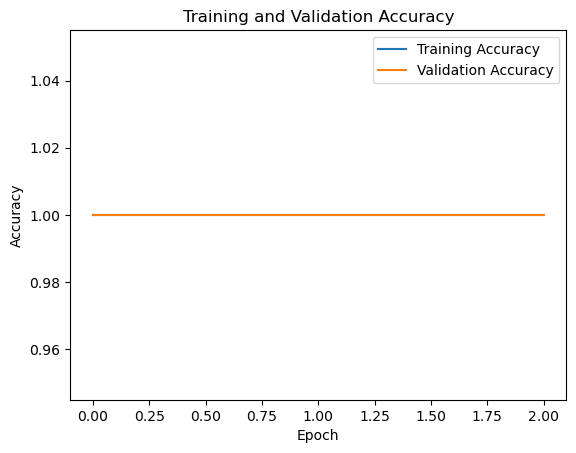

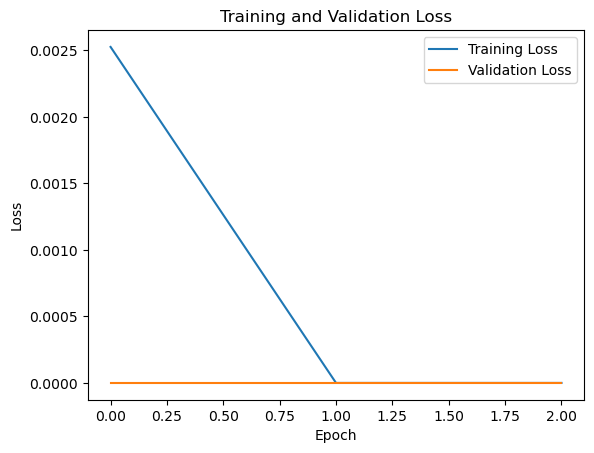

59/59 [==============================] - 6s 100ms/step - loss: 8.1960e-22 - accuracy: 1.0000
Validation accuracy: 1.0


In [84]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print('Validation accuracy:', val_acc)

